## Machine Learning part 2

#### 1. Importing libraries and data renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [68]:
path = r'C:\Users\13526\Documents\Airbnb Data Project'

In [69]:
df = pd.read_csv(os.path.join(path, '02 Data', 'airbnb_clean.csv'))

C:\Users\13526\AppData\Local\Temp\ipykernel_29420\2030327754.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, '02 Data', 'airbnb_clean.csv'))


In [70]:
df.shape

(225967, 17)

In [71]:
df.head()

,Unnamed: 0,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,0,38585,Charming Victorian home - twin beds + breakfast,165529,NaN,28804,35.65146,-82.62792,Private room,60,1,138,2020-02-16,1.14,1,0,Asheville
1,1,80905,French Chic Loft,427027,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,2020-07-09,1.03,11,288,Asheville
2,2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,2019-11-30,0.81,2,298,Asheville
3,3,155305,Cottage! BonPaul + Sharky's Hostel,746673,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,2020-09-22,2.39,5,0,Asheville
4,4,160594,Historic Grove Park,769252,NaN,28801,35.61442,-82.54127,Private room,125,30,58,2015-10-19,0.52,1,0,Asheville


In [88]:
df2 = df.drop(columns = ['name', 'reviews_per_month', 'last_review', 'neighbourhood', 'neighbourhood_group', 'room_type', 'city'])

In [89]:
df2.isnull().sum()

Unnamed: 0                        0
id                                0
host_id                           0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### 2. The elbow technique

In [90]:
num_cl = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [91]:
df2.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,225967.000000,2.259670e+05,2.259670e+05,225967.000000,225967.000000,225967.000000,225967.000000,225967.000000,225967.000000,225967.000000
mean,113013.804405,2.547282e+07,9.352379e+07,35.662211,-103.221079,219.562241,9.916280,34.510420,16.702722,159.305961
std,65250.277021,1.317788e+07,9.827302e+07,6.850380,26.223535,569.086037,21.208074,63.608121,51.075472,140.175638
min,0.000000,1.090000e+02,2.300000e+01,18.920990,-159.714900,0.000000,1.000000,0.000000,1.000000,0.000000
25%,56506.500000,1.515974e+07,1.399310e+07,32.761740,-118.598295,75.000000,1.000000,1.000000,1.000000,0.000000
50%,113013.000000,2.591052e+07,5.138445e+07,37.259970,-97.816610,121.000000,2.000000,8.000000,2.000000,140.000000
75%,169519.500000,3.772717e+07,1.497110e+08,40.724035,-76.920265,201.000000,7.000000,39.000000,6.000000,311.000000
max,226029.000000,4.556085e+07,3.679176e+08,47.734620,-70.995950,24999.000000,366.000000,966.000000,593.000000,365.000000


In [92]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225967 entries, 0 to 225966
Data columns (total 10 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      225967 non-null  int64  
 1   id                              225967 non-null  int64  
 2   host_id                         225967 non-null  int64  
 3   latitude                        225967 non-null  float64
 4   longitude                       225967 non-null  float64
 5   price                           225967 non-null  int64  
 6   minimum_nights                  225967 non-null  int64  
 7   number_of_reviews               225967 non-null  int64  
 8   calculated_host_listings_count  225967 non-null  int64  
 9   availability_365                225967 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 17.2 MB


In [93]:
score = [kmeans[i].fit(df2).score(df2) for i in range(len(kmeans))]
score

[-2.221527707225112e+21,
 -5.408654179407581e+20,
 -2.3910385171605314e+20,
 -1.5358836445183158e+20,
 -1.0849934186134997e+20,
 -7.983585331884735e+19,
 -6.640490696562501e+19,
 -5.358750366648109e+19,
 -4.58578104948608e+19,
 -3.987246120202906e+19,
 -3.5443926307200393e+19,
 -3.1071038508108526e+19,
 -2.808169038014039e+19,
 -2.5500809817234776e+19,
 -2.351155995041333e+19,
 -2.1692633582594716e+19,
 -2.0458890206093664e+19,
 -1.8911362297457e+19,
 -1.7731390729853741e+19]

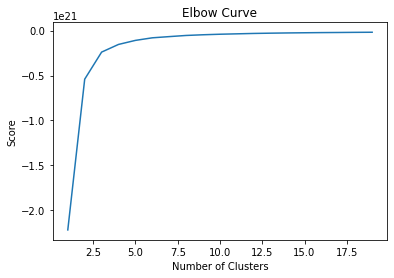

In [94]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### 3. k-means clustering 

In [101]:
kmeans = KMeans(n_clusters = 3)

In [102]:
kmeans.fit(df2)

KMeans(n_clusters=3)

In [105]:
df2['clusters'] = kmeans.fit_predict(df2)

In [106]:
df2['clusters'].value_counts()

0    133626
1     55838
2     36503
Name: clusters, dtype: int64

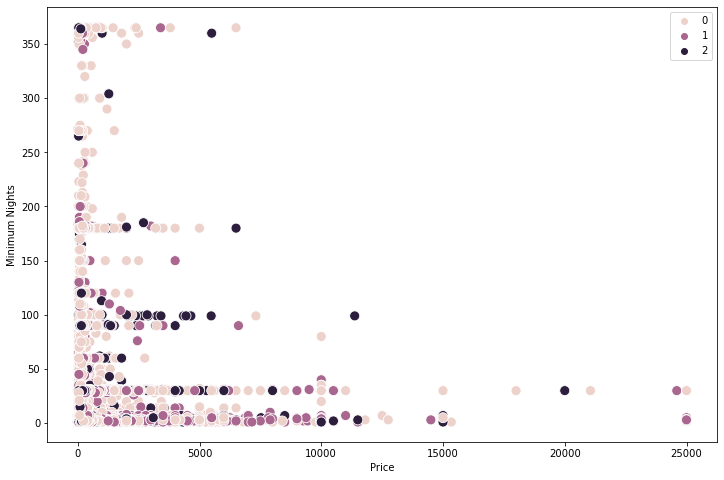

In [107]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df2['price'], y=df2['minimum_nights'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Price')
plt.ylabel('Minimum Nights')
plt.show()

In [113]:
df2.loc[df2['clusters'] == 2, 'clusters'] = 'dark purple'
df2.loc[df2['clusters'] == 1, 'clusters'] = 'purple'
df2.loc[df2['clusters'] == 0, 'clusters'] = 'pink'

In [114]:
df2.groupby('clusters').agg({'price':['mean', 'median'],
                           'minimum_nights':['mean', 'median'],
                            'number_of_reviews':['mean', 'median']})

price        minimum_nights        number_of_reviews       
                   mean median           mean median              mean median
clusters                                                                     
dark purple  220.012191  116.0      10.035203    2.0         12.726981    2.0
pink         202.282565  120.0      10.466159    3.0         42.801573   11.0
purple       260.620115  128.0       8.522619    2.0         28.909345    7.0

I found that staying longer could end up being cheaper in the long run. I don't see any long term rentals that are high in price whereas the short term rentals could be extremely high in price.